In [1]:
%matplotlib inline

In [2]:
import os
os.chdir('/Users/evanbiederstedt/downloads/cellsamples')   
# files at http://www.broadinstitute.org/~kendell/seq/scRRBS/anno/

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
pd.set_option('display.max_columns', 50) # print all rows

In [4]:
df1 = pd.read_table('RRBS_NormalBCD19_CD27_cell1_22_CGAGGCTG.ACCGCG.reads.anno') # example mammary cell, GD27

In [5]:
df1.head()

,chr,start,cpgMeth,cpgUnmeth,readMeth,readUnmeth,readMixed,avCpgCount,epiProb,discProb,expDisc,epiReadTypeCount,tss,tssDistance,genesDistance,exonsDistance,intronsDistance,promoterDistance,cgi,cgiDistance,geneDensity,ctcfDistance,ctcfUpDistance,ctcfDownDistance,ctcfDensity,geneDistalRegulatoryModulesDistance,3PrimeUTRDistance,5PrimeUTRDistance,firstExonDistance,hypoInHues64Distance
0,chr1,523390,16,14,0,0,10,3.0,0.48,0.053860,7.466667,2,OR4F16,98644,97705,97705,97705,97644.0,2,40969,55,1741,1741.0,22611.0,44,299510,356143,337730,97705,9884412.0
1,chr1,852026,22,33,0,0,11,5.0,0.00,0.363031,10.032000,1,LOC100130417,2791,926,926,926,1791.0,8,5762,67,3472,3472.0,4420.0,62,17626,27507,9094,2688,9555776.0
2,chr1,895127,24,12,0,0,4,9.0,0.00,0.899753,3.895748,1,NOC2L,448,448,448,533,-1448.0,12,-970,68,8072,8072.0,16292.0,65,60727,5444,448,448,9512675.0
3,chr1,917687,52,52,0,0,13,8.0,0.00,0.903064,12.898438,1,C1orf170,214,214,214,243,-1214.0,16,5770,68,1809,5936.0,1809.0,65,83287,7203,15776,214,9490115.0
4,chr1,986063,42,12,0,0,6,9.0,0.00,0.516868,5.375034,1,RNF223,23624,-30561,42,-92,22624.0,21,8226,70,513,9785.0,513.0,68,103437,4298,21883,23332,9421739.0


In [6]:
print(df1.shape)
print('There are ' + str(df1.shape[0])+ ' number of rows')

(5114, 30)
There are 5114 number of rows


In [7]:
cols = list(range(8,30)) # define list of columns to drop
df1 = df1.drop(df1.columns[cols],axis=1) # drop columns

In [8]:
df1.head(10)

,chr,start,cpgMeth,cpgUnmeth,readMeth,readUnmeth,readMixed,avCpgCount
0,chr1,523390,16,14,0,0,10,3.0
1,chr1,852026,22,33,0,0,11,5.0
2,chr1,895127,24,12,0,0,4,9.0
3,chr1,917687,52,52,0,0,13,8.0
4,chr1,986063,42,12,0,0,6,9.0
5,chr1,992710,23,23,0,0,23,2.0
6,chr1,1023246,16,2,0,0,2,9.0
7,chr1,1052599,6,24,0,0,6,5.0
8,chr1,1057756,6,12,0,0,6,3.0
9,chr1,1094887,24,6,0,0,6,5.0


In [9]:
df1['total_reads'] = df1[["readMeth", "readUnmeth", "readMixed"]].sum(axis=1)  # sum total reads

In [10]:
df1['PDR'] = df1.apply(lambda row: row['readMixed']/row['total_reads'], axis=1)

In [11]:
df1.head(10)

,chr,start,cpgMeth,cpgUnmeth,readMeth,readUnmeth,readMixed,avCpgCount,total_reads,PDR
0,chr1,523390,16,14,0,0,10,3.0,10,1.0
1,chr1,852026,22,33,0,0,11,5.0,11,1.0
2,chr1,895127,24,12,0,0,4,9.0,4,1.0
3,chr1,917687,52,52,0,0,13,8.0,13,1.0
4,chr1,986063,42,12,0,0,6,9.0,6,1.0
5,chr1,992710,23,23,0,0,23,2.0,23,1.0
6,chr1,1023246,16,2,0,0,2,9.0,2,1.0
7,chr1,1052599,6,24,0,0,6,5.0,6,1.0
8,chr1,1057756,6,12,0,0,6,3.0,6,1.0
9,chr1,1094887,24,6,0,0,6,5.0,6,1.0


There are 4719 total number of PDR values == 1.0


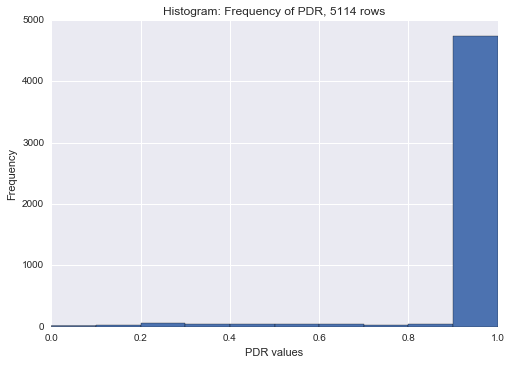

In [12]:
plt.figure()
plt.title('Histogram: Frequency of PDR, 5114 rows')
plt.xlabel('PDR values')
plt.ylabel('Frequency')
df1['PDR'].plot(kind='hist')
# Note that the vast majority of PDR values are 1.0
print('There are ' + str(len(df1[df1['PDR']==1])) + ' total number of PDR values == 1.0')

In [13]:
PDR_lessthan1 = df1[df1['PDR'] < 1.0]  # simply remove all 1.0 values

There are 395 total number of samples with PDR values < 1.0


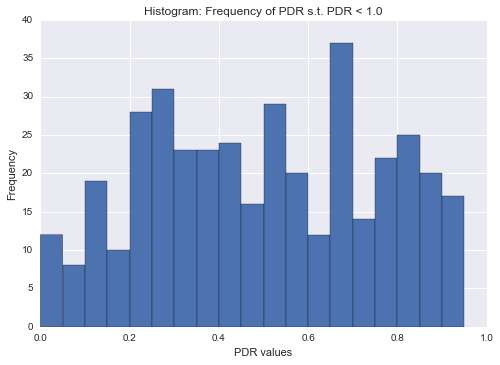

In [14]:
plt.figure()
plt.title('Histogram: Frequency of PDR s.t. PDR < 1.0')
plt.xlabel('PDR values')
plt.ylabel('Frequency')
xticks = [x * 0.05 for x in list(range(0, 20))]  # set xticks 0.0, 0.05, 0.1, 0.15, etc.
PDR_lessthan1['PDR'].plot(kind='hist', bins = xticks)
print('There are ' + str(len(PDR_lessthan1['PDR'])) + ' total number of samples with PDR values < 1.0')

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


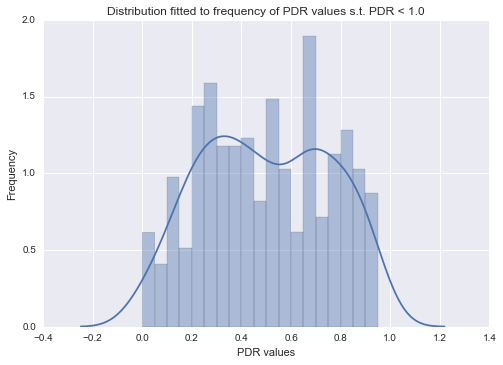

In [15]:
sns.distplot(PDR_lessthan1['PDR'], bins = xticks)  # Flexibly plot a univariate distribution against observations.
plt.title('Distribution fitted to frequency of PDR values s.t. PDR < 1.0')
plt.xlabel('PDR values')
plt.ylabel('Frequency')